In [1]:
import numpy as np
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import pandas as pd
import shutil, pickle, os, random, matplotlib
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
import torch
import torchvision

# <strong>Main</strong>


## Data 
The data is converted into RGB tensors with skimage.io.imread()

<strong>Notice:</strong> pip install scikit-image 

### (function) Pickling data 

In [3]:
def pickle_data(file, writeColumns=None):
    """
    Read/Write pickle training/testing data, models to avoid
    loading data again (time consuming)
    
    ---Params---

    file: path to pickle file

    writeColumns (array): variables to be saved to pickle file

    """
    if writeColumns is None:
        with open(file, mode="rb") as f:
            dataset = pickle.load(f)
            return tuple(map(lambda col: dataset[col], ['images', 'labels'])) # lambda(col) where columns are the inputs
    else:
        with open(file, mode="wb") as f:
            dataset = pickle.dump({"images": writeColumns[0], "labels": writeColumns[1]}, f)
            print("Data is saved in", file)
# lambda function: https://www.youtube.com/watch?v=BcbVe1r2CYc


### (function) Label the test dataset


In [5]:
def label_test(src, csv_file, labeled_test_dir, NoOfCategories):
    """
    This function creates named folders corresponding to 43 categories
    and move the test images to these folders

    `csv_file` and `labeled_test_dir` should have already been in src directly 
    (create a blank folder to store labeled images)

    """
    # Remove the existing folders in the labeled test directory if there is any
    for filename in os.listdir(labeled_test_dir):
        file_path = os.path.join(labeled_test_dir, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

    csv_dir = os.path.join(src, csv_file)
    SubTestDir = [os.path.join(labeled_test_dir, str(d)) for d in range(NoOfCategories)]
    
    # Create label folders
    [os.mkdir(test_d) for test_d in SubTestDir]

    testImageDir = pd.read_csv(csv_dir)['Path']
    testImageLabel = pd.read_csv(csv_dir)['ClassId']
    for idx in range(len(testImageLabel)):
        label = testImageLabel[idx]
        shutil.copy(os.path.join(src, testImageDir[idx]), SubTestDir[label])

labeled_test_dir = "D:\Programming Files\Python Files\Deep learning - traffic signs\German\LabeledTest"
src = "D:\Programming Files\Python Files\Deep learning - traffic signs\German"
csv_file = "Test.csv"
NoOfCats = 43

label_test(src, csv_file, labeled_test_dir, NoOfCats)


### (function) Load 

In [3]:
def load_data(data_dir):
    """Loads a data set and returns two lists:
    
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """
    # Get all subdirectories of data_dir. Each represents a label.
    directories = [d for d in os.listdir(data_dir) 
                   if os.path.isdir(os.path.join(data_dir, d))]
    # Loop through the label directories and collect the data in
    # two lists, labels and images.
    labels = []
    images = []
    for d in directories:
        # label_dir contains 61 catefories paths
        label_dir = os.path.join(data_dir, d)

        # list subdirectories within each of the 61 categories
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".png")]
        # For each label, load it's images and add them to the images list.
        # And add the label number (i.e. directory name) to the labels list.
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "D:\Programming Files\Python Files\Deep learning - traffic signs\German"

### Last execution 10:01PM 20/5/23
!!!: resized images are already normalized to [0,1] format

In [ ]:
# Load training dataset.
train_data_dir = os.path.join(ROOT_PATH, "Train")
first_train_images, first_train_labels = load_data(train_data_dir)
pickle_data(file = "primary_train_dataset", writeColumns = [first_train_images, first_train_labels] )

In [153]:
# Apply constant resolution among train images and pickle them 
train_images, train_labels  = pickle_data(file = 'primary_train_dataset')

train_images = [ skimage.transform.resize(train_image, (32, 32), mode = "constant") 
                            for train_image in train_images ]

train_images = np.stack(train_images, axis = 0)

pickle_data(file = "primary32_train_dataset", writeColumns = [train_images, train_labels])

Data is saved in primary32_train_dataset


In [154]:
# Load the test dataset
test_data_dir = os.path.join(ROOT_PATH, "LabeledTest")
first_test_images, first_test_labels = load_data(test_data_dir)
test_images, val_images, test_labels, val_labels = train_test_split(first_test_images, first_test_labels, 
                                                                        test_size=0.36, random_state=0)
pickle_data(file = "primary_test_dataset", writeColumns = [test_images, test_labels])
pickle_data(file = "primary_val_dataset", writeColumns = [val_images, val_labels])

Data is saved in primary_test_dataset
Data is saved in primary_val_dataset


In [155]:
# Apply constant resolution among test,val images and pickle them 
test_images, test_labels  = pickle_data(file = 'primary_test_dataset')
val_images, val_labels  = pickle_data(file = 'primary_val_dataset')

test_images = [ skimage.transform.resize(test_image, (32, 32), mode = "constant") 
                            for test_image in test_images ]
val_images = [ skimage.transform.resize(val_image, (32, 32), mode = "constant") 
                            for val_image in val_images ]

test_images = np.stack(test_images, axis = 0)
val_images = np.stack(val_images, axis = 0)

pickle_data(file = "primary32_test_dataset", writeColumns = [test_images, test_labels])
pickle_data(file = "primary32_val_dataset", writeColumns = [val_images, val_labels])

Data is saved in primary32_test_dataset
Data is saved in primary32_val_dataset


### Load pickled data

In [4]:
# Program starts here if pickle folders are not updated
train_images, train_labels  = pickle_data(file = './Data/primary32_train_dataset')
test_images, test_labels  = pickle_data(file = './Data/primary32_test_dataset')
val_images, val_labels  = pickle_data(file = './Data/primary32_val_dataset')

In [7]:
print(train_images.shape)

(39209, 32, 32, 3)


### (function) Display images


In [5]:
def display_images(images, labels, category=False, greyScale=False):
    """
    Display the first image of each label.
    
    category: set to True when only images within a category are displayed
    greyScale: set to True to display images in grey scale
    """

    if category:
        i = 1
        startIndex = labels.index(category)
        catImages = images[startIndex:(startIndex + labels.count(category))] #catImage = categoryImage
        
        plt.figure(figsize=(15, 15))
        for catImage in catImages[:24]:
            plt.subplot(8, 8, i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(catImage)
            i += 1 
    else:
        unique_labels = set(labels) # Create a list contains only the labels (non-iterative)
    
        #Example: a = [1, 1, 1, 2, 2, 3]
        #set(a) >> {1,2,3}

        plt.figure(figsize=(15, 15))
        i = 1
        for label in unique_labels:
            image = images[labels.index(label)] # Pick the first image for each label.

        # object.index(element) returns the index of the element specified when it's first encountered
        # Example: a = [1, 1, 1, 3, 2, 2, 3]
        # a.index(3) = 3

            plt.subplot(8, 8, i)  # A grid of 8 rows x 8 columns
            plt.xticks([])
            plt.yticks([])
            plt.title("Label {0} ({1})".format(label, labels.count(label))) # sign category and the # of its samples
            if greyScale is False:
                plt.imshow(image)
            else:
                plt.imshow(image, cmap=plt.cm.binary)
            i += 1
    plt.show()

### (function) Convert to grey scale, improve contrast

In [16]:
from skimage import exposure

def preprocess_images(images):
    """
        - Convert RGB images to grey scale 
        - Normalize pixels to 0-1,
        - Improve the contrast with adaptive histogram localization
    """
    # Conver RGB -> grey scale
    images = 0.299 * images[:, :, 0] + 0.587 * images[:, :, 1] + 0.114 * images[:, :, 2]

    # Improve the contrast
    images = exposure.equalize_adapthist(images)

    # Add ONE 3-D channel for grey scale
    images = images.reshape(images.shape + (1,)) 

    return images

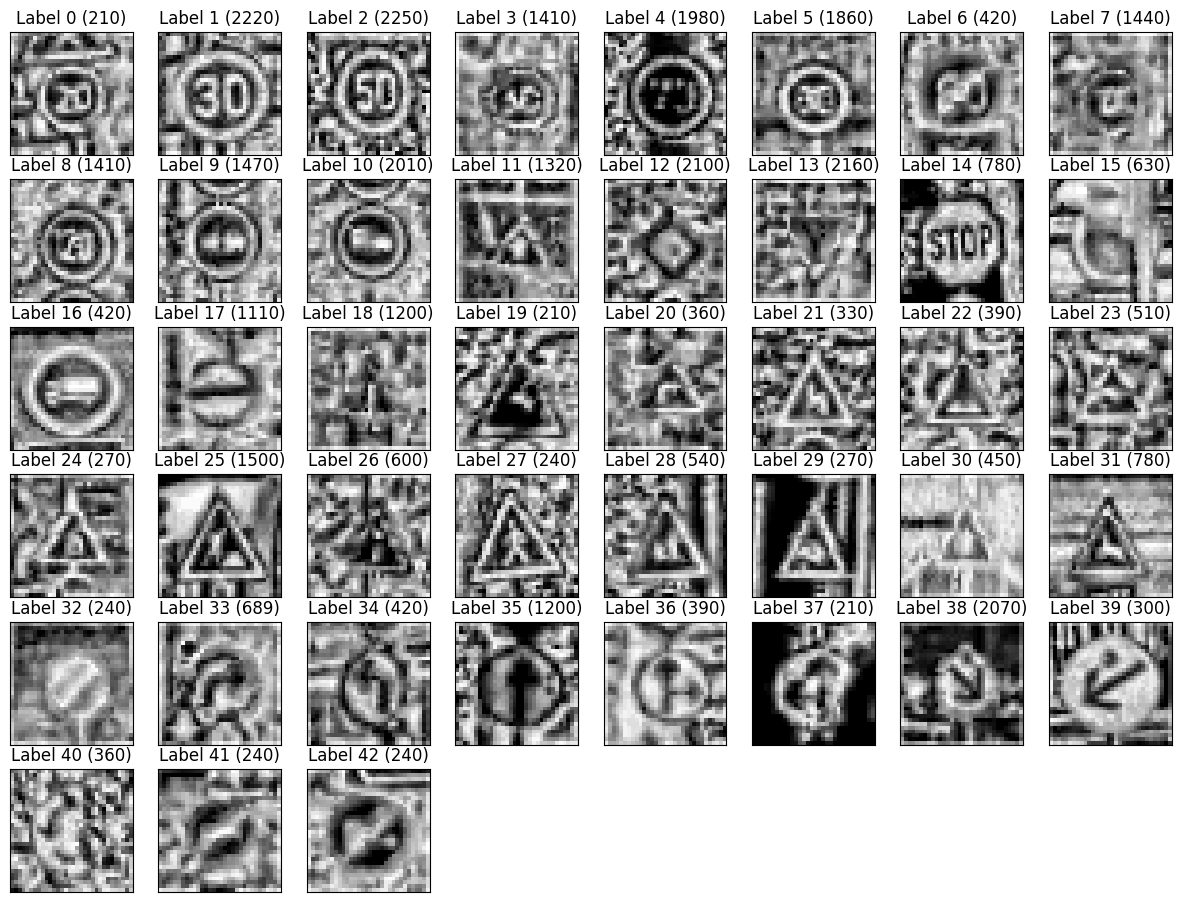

In [31]:
# Display all images 
display_images(preprocess_images(train_images, improveCon=True), train_labels, greyScale=True)

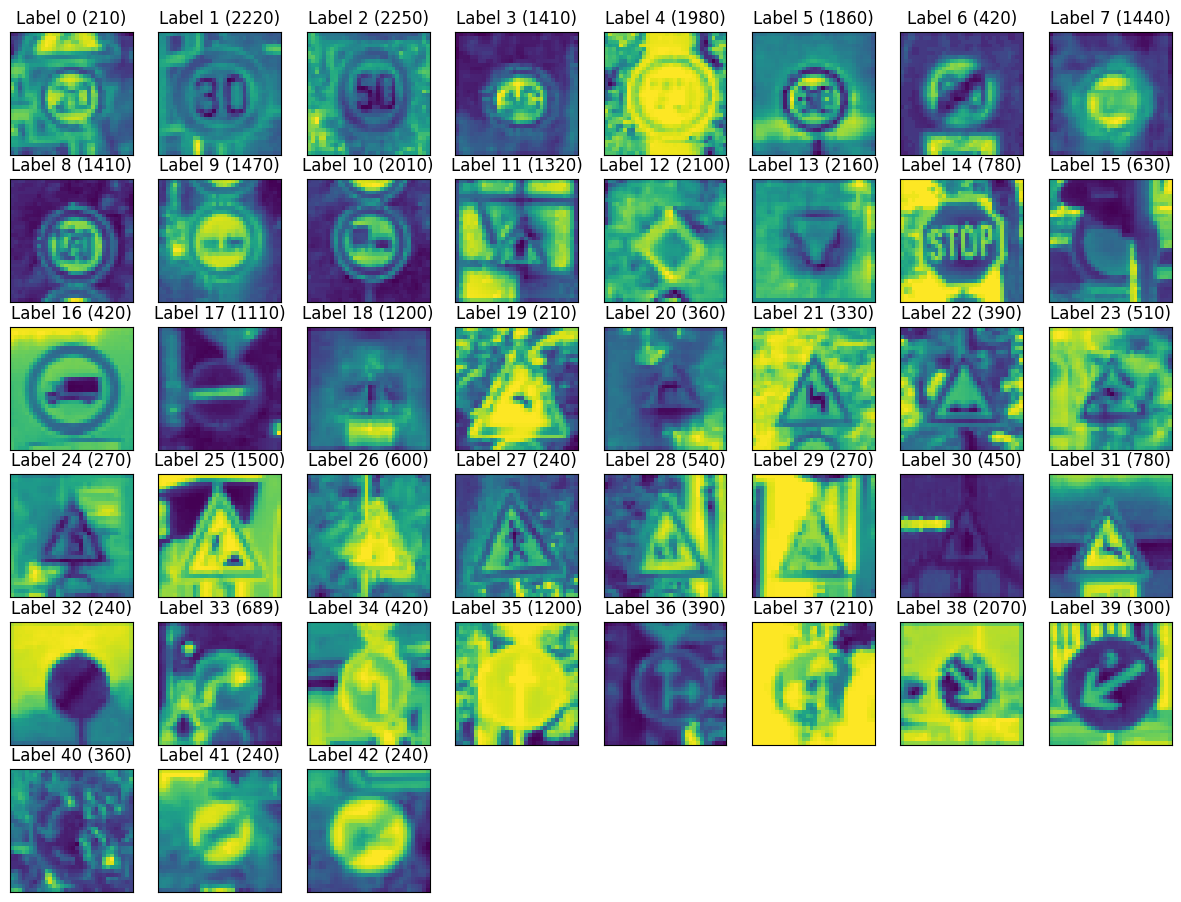

In [9]:
# Display all images 
display_images(preprocess_images(train_images), train_labels)

### Classes distribution

Text(0, 0.5, 'Number of images')

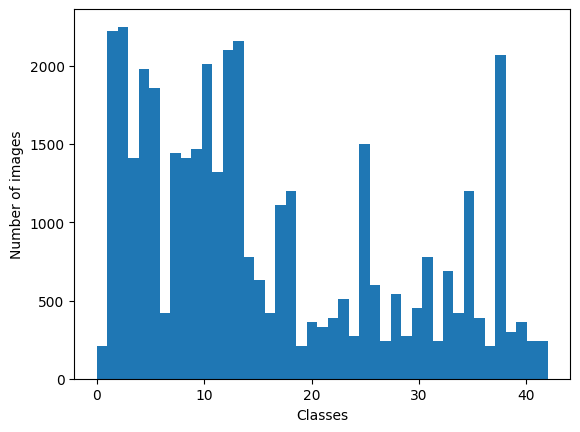

In [18]:
fig, ax = plt.subplots()
n_classes = len(set(train_labels))
values, bins, patches = ax.hist(train_labels, n_classes)
ax.set_xlabel("Classes")
ax.set_ylabel("Number of images")

## Data Augmentation

In [28]:
print(type(train_images[0,3,4,1]))

<class 'numpy.float64'>


In [26]:
from keras.preprocessing.image import ImageDataGenerator

# convert from int to float
X_train = train_images

train_datagen = ImageDataGenerator()
inference_datagen = ImageDataGenerator()
train_datagen_augmented = ImageDataGenerator(
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_images)
train_datagen.fit(X_train)
train_datagen_augmented.fit(X_train)


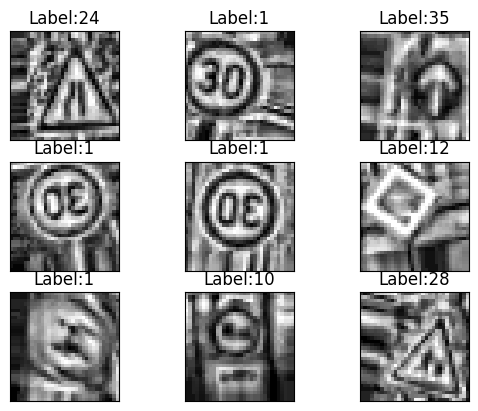

In [27]:
fig = plt.figure()
n = 0
graph_size = 3

for x_batch, y_batch in train_datagen_augmented.flow(X_train, train_labels, batch_size=1):
    a=fig.add_subplot(graph_size, graph_size, n+1)
    imgplot = plt.imshow(x_batch[0])
    plt.xticks([])
    plt.yticks([])
    plt.title("Label:{}".format(y_batch[0]))
    n = n + 1
    if n > 8:
        break
# plt.show()

## Model


# <strong>Miscellaneous</strong>

## Layer example

In [3]:
# for one layer
class MyDenseLayer(tf.keras.layers.Layer):
    def __init__(self, input_dim, output_dim):
        super(MyDenseLayer, self).__init__() # inherits tf.leras.layers.Layer attributes and behaviors  

        #Initialize weights and biases
        self.W = self.add_weight([input_dim, output_dim])
        self.b = self.add_weight([1, output_dim])

        def call(self, inputs):
            z = tf.matmul(inputs, self.W) + self.b
            outputs = tf.math.sigmoid(z)
            return outputs

## Gradient computation

In [29]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)


tf.Tensor(6.0, shape=(), dtype=float32)


## Super() examples
use super to access the characteristics of other classes
Ex:
super().__init__(mammalName) is equivalent to Class1.__init_(self, mammalName)

### Example 1

In [14]:
class Animal(object):
  def __init__(self, Animal):
    print(Animal, 'is an animal.')

class Mammal(Animal):
  def __init__(self, mammalName):
    print(mammalName, 'is a warm-blooded animal.')
    super().__init__(mammalName)

class NonMarineMammal(Mammal):
  def __init__(self, NonMarineMammal):
    print(NonMarineMammal, "can't swim.")
    super().__init__(NonMarineMammal)
   
class NonWingedMammal(Mammal):
  def __init__(self, NonWingedMammal):
    print(NonWingedMammal, "can't fly.")
    super().__init__(NonWingedMammal)

class Dog(NonMarineMammal, NonWingedMammal):
  def __init__(self):
    print('Dog has 4 legs.')
    super().__init__('Dog')
    
d = Dog()
print(d)
# bat = NonMarineMammal('Bat')

Dog has 4 legs.
Dog can't swim.
Dog can't fly.
Dog is a warm-blooded animal.
Dog is an animal.


### Example 2

In [25]:
class Rectangle(object):
    def __init__(self, length, width):
        self.length = length
        self.width = width

    def area(self):
        return self.length * self.length

    def perimeter(self):
        return 2 * self.length + 2 * self.width

# Here we declare that the Square class inherits from the Rectangle class
class Square(Rectangle):
    def __init__(self, length_sqr):
        super().__init__(length_sqr, length_sqr)   # length_sqr = length and width of class Rectangle
Square(5).area()

25

### PIL module

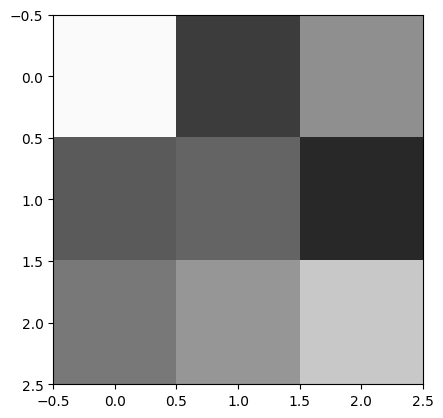

In [4]:

a = np.matrix('250 60 143; 90 100 40; 120 150 200')
im = Image.fromarray(a) # create a n image object as arrays
plt.imshow(im)